<a href="https://colab.research.google.com/github/sabiha0613/64061_smhatarn/blob/main/Assignment_2_Convolution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Assignment #1 (Neural Networks)

Submitted By: Sabiha Mhatarnaik


### Downloading the data

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sabihanaik","key":"13e9aea93f71a693f52aea345d2ddd82"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats
!unzip -qq dogs-vs-cats.zip

 99% 804M/812M [00:19<00:00, 81.6MB/s]
100% 812M/812M [00:20<00:00, 42.0MB/s]


In [ ]:
!unzip -qq train.zip

In [ ]:
!unzip -qq test1.zip

In [ ]:
#shutil.rmtree("./cats_vs_dogs_small", ignore_errors=True)
#shutil.rmtree("./test1", ignore_errors=True)
#shutil.rmtree("./train", ignore_errors=True)


#Question 1

Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of500(like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

**Copying images to training, validation, and test directories**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

**Data preprocessing**
######Converting the data into Preprocessed flaoting point tensors before being fed into the model.
######Since the data is in the JPEG file format,here are the steps of  preprocessing:
######1.Read the pictures
######2.Convert JPEG content into RGB grid of pixels
######3. Convert RGB grid of pixels into floating point tensors
######4. Resize them
######5. Make them into batches

In [ ]:
# Managing the file direcotry; Splitting the file system into train(1000), test(500) and validation(500) folders
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Create a datset instance from NumPy array of random numbers of 1000 samples and each sample of vector size 16**

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

**Batching the data into batches of size 32**

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`** 

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


##Building the model
**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

**Fitting the model using a `Dataset`**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 45ms/step - loss: 0.6954 - accuracy: 0.5035 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 3s 40ms/step - loss: 0.6891 - accuracy: 0.5300 - val_loss: 0.6867 - val_accuracy: 0.5400
Epoch 3/30
63/63 [==============================] - 3s 39ms/step - loss: 0.6810 - accuracy: 0.5925 - val_loss: 0.7388 - val_accuracy: 0.5180
Epoch 4/30
63/63 [==============================] - 3s 40ms/step - loss: 0.6514 - accuracy: 0.6255 - val_loss: 0.7171 - val_accuracy: 0.5690
Epoch 5/30
63/63 [==============================] - 3s 40ms/step - loss: 0.6308 - accuracy: 0.6465 - val_loss: 0.6401 - val_accuracy: 0.6430
Epoch 6/30
63/63 [==============================] - 3s 40ms/step - loss: 0.6191 - accuracy: 0.6600 - val_loss: 0.6401 - val_accuracy: 0.6280
Epoch 7/30
63/63 [==============================] - 3s 40ms/step - loss: 0.5857 - accuracy: 0.6935 - val_loss: 0.5990 - val_accuracy: 0.6710
Epoch 8/30
6

**Displaying curves of loss and accuracy during training**

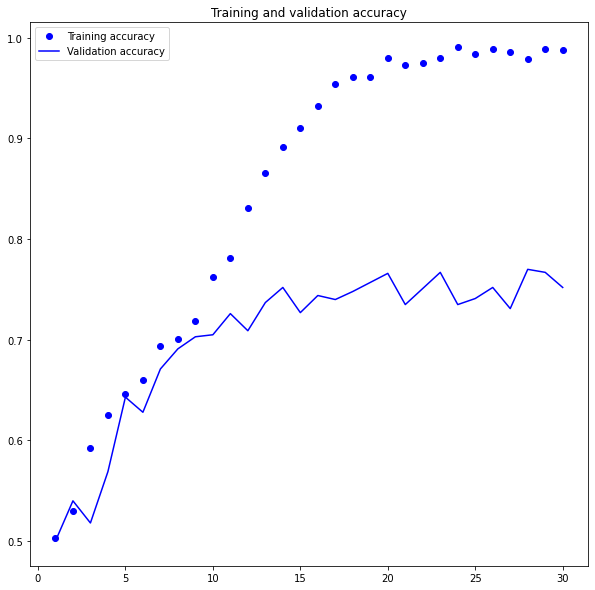

<Figure size 432x288 with 0 Axes>

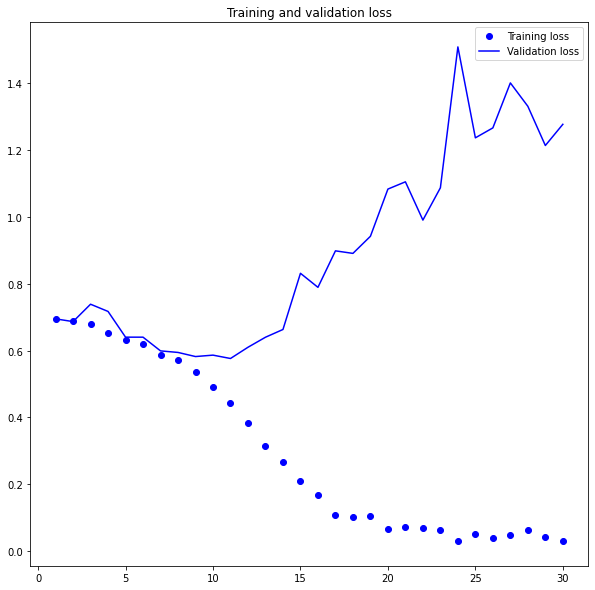

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 29ms/step - loss: 0.6401 - accuracy: 0.6940
Test accuracy: 0.694


####Q2.  Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

In [ ]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

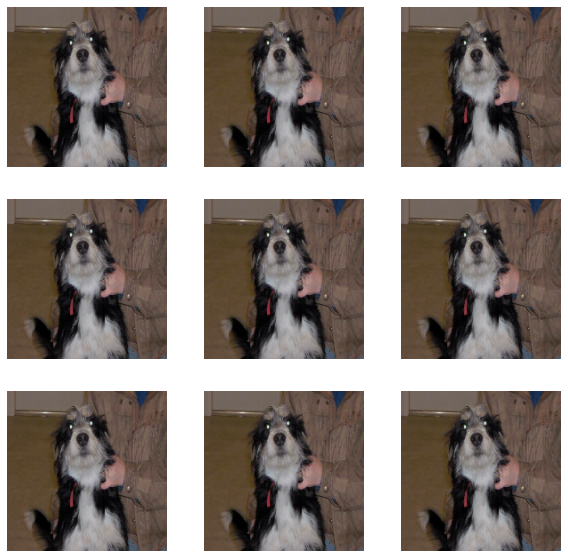

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 4s 44ms/step - loss: 0.6946 - accuracy: 0.5115 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/50
63/63 [==============================] - 3s 43ms/step - loss: 0.6934 - accuracy: 0.5140 - val_loss: 0.6908 - val_accuracy: 0.6050
Epoch 3/50
63/63 [==============================] - 3s 42ms/step - loss: 0.6927 - accuracy: 0.5070 - val_loss: 0.6910 - val_accuracy: 0.5530
Epoch 4/50
63/63 [==============================] - 3s 43ms/step - loss: 0.6870 - accuracy: 0.5635 - val_loss: 0.6877 - val_accuracy: 0.5340
Epoch 5/50
63/63 [==============================] - 3s 42ms/step - loss: 0.6863 - accuracy: 0.5400 - val_loss: 0.7878 - val_accuracy: 0.5120
Epoch 6/50
63/63 [==============================] - 3s 41ms/step - loss: 0.6903 - accuracy: 0.5610 - val_loss: 0.6963 - val_accuracy: 0.5100
Epoch 7/50
63/63 [==============================] - 3s 43ms/step - loss: 0.6805 - accuracy: 0.5780 - val_loss: 0.6813 - val_accuracy: 0.5760
Epoch 8/50
63

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 19ms/step - loss: 0.4478 - accuracy: 0.8120
Test accuracy: 0.812


#### Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

### Increasing the training sample to 2000, keeping the Validation and test sets the same as before(500 samples)

In [ ]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

**Defining a new convnet with increased training samples,image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 4s 44ms/step - loss: 0.6958 - accuracy: 0.4950 - val_loss: 0.6922 - val_accuracy: 0.5300
Epoch 2/50
63/63 [==============================] - 3s 43ms/step - loss: 0.6905 - accuracy: 0.5440 - val_loss: 0.6711 - val_accuracy: 0.5920
Epoch 3/50
63/63 [==============================] - 3s 42ms/step - loss: 0.6741 - accuracy: 0.5900 - val_loss: 0.6621 - val_accuracy: 0.6120
Epoch 4/50
63/63 [==============================] - 3s 42ms/step - loss: 0.6471 - accuracy: 0.6455 - val_loss: 0.6809 - val_accuracy: 0.5620
Epoch 5/50
63/63 [==============================] - 3s 42ms/step - loss: 0.6426 - accuracy: 0.6405 - val_loss: 0.6504 - val_accuracy: 0.6010
Epoch 6/50
63/63 [==============================] - 3s 41ms/step - loss: 0.6365 - accuracy: 0.6505 - val_loss: 0.6608 - val_accuracy: 0.5990
Epoch 7/50
63/63 [==============================] - 3s 43ms/step - loss: 0.6312 - accuracy: 0.6510 - val_loss: 0.6142 - val_accuracy: 0.6630
Epoch 8/50
63

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 18ms/step - loss: 0.4003 - accuracy: 0.8130
Test accuracy: 0.813


# Overall idea of the first, second, and third quarters

—-



### To create a baseline, I trained a simple convnet on the 1,000 training examples without any tuning, which gave us a classification accuracy of around 70%. Overfitting was recognized as the main concern.

###After that, I covered data augmentation as well as other optimization strategies such as earlystopping (which finds the best amount of epochs), Regularization, and Dropout. With the help of data augmentation, we were able to boost the model's accuracy to 80%.

###After that, I looked for the best training sample to improve classification accuracy.

###

The best approaches to avoid overfitting have been discovered by manipulating the training sample and using other optimization techniques.
### 1. **Increasing the training sample** - It is not always possible to increase the training sample. Data Augmentation is one technique to make the most of the fewer training data.
### 2. **Reducing the network's capacity** - It was discovered that shrinking the model's size, i.e. the number of learnable parameters in the model, which is effectively the number of layers and units in layers, significantly reduces overfitting.
### 3. **Adding weight regularization** - Limiting the complexity of a network by constraining the weights to take only tiny values, which helps to regularize the distribution of the weight values and so prevents or minimizes overfitting.
### 4. **Adding dropout** - During training, zeroing out a few of the layer's output characteristics helps to reduce overfitting. The percentage of features that are zeroed out is known as the dropout rate.

####Q4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

### Feature extraction without data augmentation using a pretrained model

**Extracting the VGG16 features and corresponding labels**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 20.7752 - accuracy: 0.9155 - val_loss: 5.4550 - val_accuracy: 0.9590
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 3.6165 - accuracy: 0.9735 - val_loss: 7.7083 - val_accuracy: 0.9560
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 2.8562 - accuracy: 0.9840 - val_loss: 4.3593 - val_accuracy: 0.9750
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.8020 - accuracy: 0.9890 - val_loss: 4.5385 - val_accuracy: 0.9730
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1075 - accuracy: 0.9930 - val_loss: 4.8715 - val_accuracy: 0.9730
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.5318 - accuracy: 0.9925 - val_loss: 4.1173 - val_accuracy: 0.9720
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.5103 - accuracy: 0.9950 - val_loss: 4.3788 - val_accuracy: 0.9720
Epoch 8/20
63/63 [=

**Plotting the results**

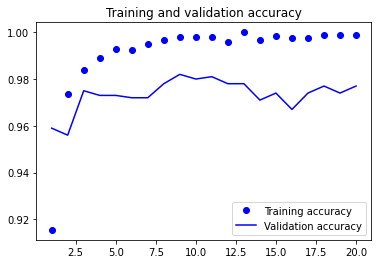

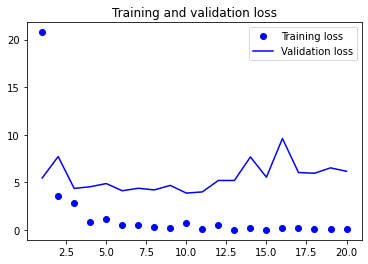

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Feature extraction with data augmentation using a pretrained model

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 8s 100ms/step - loss: 17.8009 - accuracy: 0.8975 - val_loss: 6.3747 - val_accuracy: 0.9590
Epoch 2/50
63/63 [==============================] - 6s 94ms/step - loss: 6.3915 - accuracy: 0.9450 - val_loss: 4.7695 - val_accuracy: 0.9680
Epoch 3/50
63/63 [==============================] - 6s 94ms/step - loss: 4.7758 - accuracy: 0.9570 - val_loss: 2.8818 - val_accuracy: 0.9810
Epoch 4/50
63/63 [==============================] - 6s 92ms/step - loss: 5.2852 - accuracy: 0.9565 - val_loss: 9.5302 - val_accuracy: 0.9490
Epoch 5/50
63/63 [==============================] - 6s 93ms/step - loss: 3.4053 - accuracy: 0.9660 - val_loss: 5.5518 - val_accuracy: 0.9650
Epoch 6/50
63/63 [==============================] - 6s 91ms/step - loss: 4.8088 - accuracy: 0.9660 - val_loss: 3.6121 - val_accuracy: 0.9760
Epoch 7/50
63/63 [==============================] - 6s 91ms/step - loss: 3.3580 - accuracy: 0.9670 - val_loss: 4.2873 - val_accuracy: 0.9760
Epoch 8/50


**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 57ms/step - loss: 2.1520 - accuracy: 0.9750
Test accuracy: 0.975


### A pretrained VGG16 model with Fine-tuning 
#### Fine-tuning entails unfreezing a few top layers of a frozen model foundation used for feature extraction and training both the newly added element of the model (in this case, the fully connected classifier) and these top layers at the same time. This is referred to as fine-tuning because it modifies the more abstract representations of the model that are being reused to make them more relevant to the task at hand.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 105ms/step - loss: 0.4465 - accuracy: 0.9905 - val_loss: 2.1903 - val_accuracy: 0.9730
Epoch 2/30
63/63 [==============================] - 7s 103ms/step - loss: 0.2296 - accuracy: 0.9890 - val_loss: 1.9161 - val_accuracy: 0.9760
Epoch 3/30
63/63 [==============================] - 6s 98ms/step - loss: 0.3292 - accuracy: 0.9910 - val_loss: 2.1010 - val_accuracy: 0.9760
Epoch 4/30
63/63 [==============================] - 6s 99ms/step - loss: 0.3255 - accuracy: 0.9895 - val_loss: 1.9261 - val_accuracy: 0.9750
Epoch 5/30
63/63 [==============================] - 7s 103ms/step - loss: 0.1515 - accuracy: 0.9940 - val_loss: 1.7241 - val_accuracy: 0.9800
Epoch 6/30
63/63 [==============================] - 6s 99ms/step - loss: 0.0829 - accuracy: 0.9965 - val_loss: 1.8871 - val_accuracy: 0.9790
Epoch 7/30
63/63 [==============================] - 6s 99ms/step - loss: 0.1948 - accuracy: 0.9935 - val_loss: 1.8488 - val_accuracy: 0.9750
Epoch 8/30

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 56ms/step - loss: 1.9474 - accuracy: 0.9760
Test accuracy: 0.976


In [ ]:
print(test_loss,'\n',test_acc)

1.9473657608032227 
 0.9760000109672546


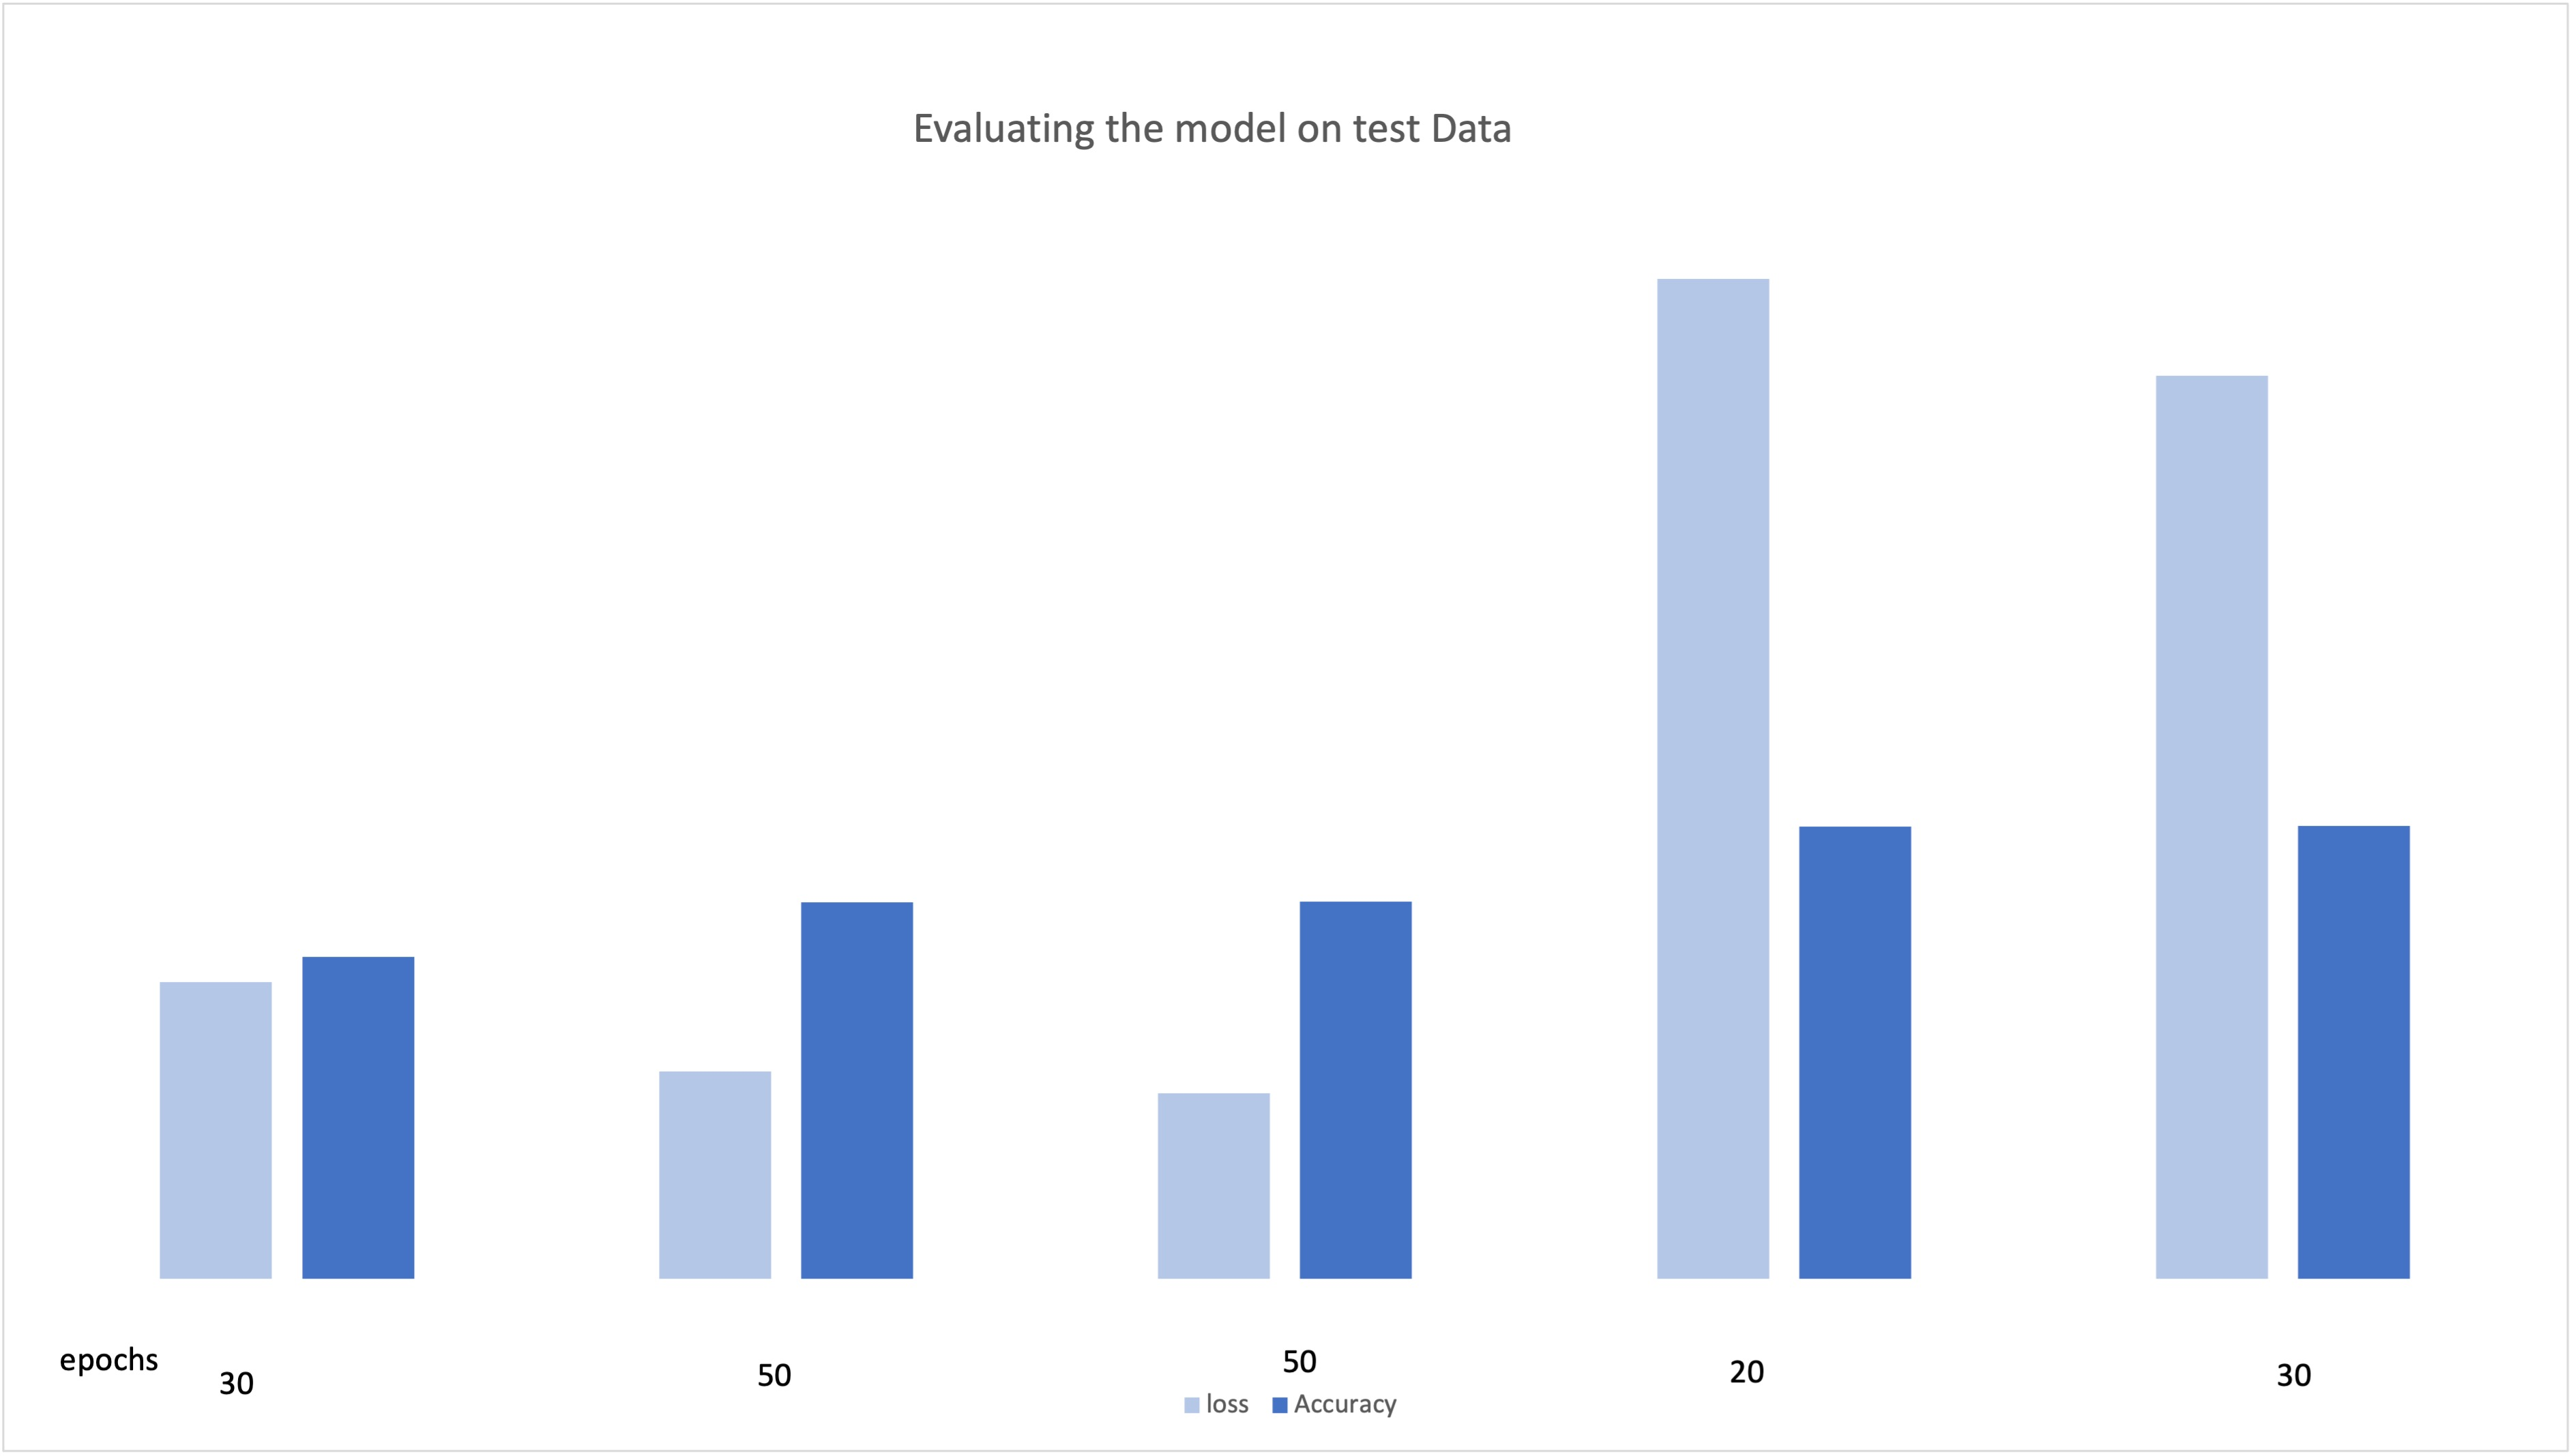

In [ ]:
labels=['convnet_from_scratch','convnet_from_scratch_model_1','convnet_from_scratch_3','convnet_from_scratch_4','pretrained_feature_extraction','pretrained_feature_extraction_with_data_augmentation','pretrained_fine_tuning']


In [ ]:
All_Loss= np.array([0.6263572573661804,
 0.594975471496582,
 2.1392126083374023,
 0.010953199118375778,
 0.010953199118375778,
 1.221186637878418,
 0.035336028784513474])*100
All_Loss
All_Accuracy= np.array([0.675000011920929,
 0.6819999814033508,
 0.734000027179718,
 0.9959999918937683,
 0.9959999918937683,
 0.968999981880188,
 0.9940000176429749])*100
All_Accuracy
plt.clf()

<Figure size 432x288 with 0 Axes>

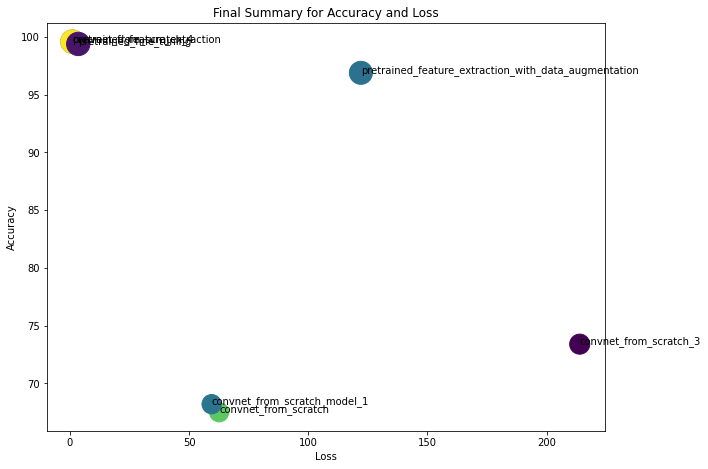

In [ ]:
fig, ax = plt.subplots(figsize=(10,7.5))
ax.scatter(All_Loss,All_Accuracy,c = np.random.rand(len(All_Accuracy)),s = np.sqrt(30 * All_Accuracy**2))
for i, txt in enumerate(labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Final Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

**Summary**

As we can see from the above graph, we may deduce that:

Because we employed such a limited sample set for training, the model was unable to extract the data's attributes, resulting in poor performance.

Training Techniques – Similarly, the performance of the pretrained layer looks to be slightly better than the model built from the ground up. The loss for the Pretrained network, on the other hand, is substantially bigger.

We can deduce from the Loss and Accuracy that the best model constructed for the cat-vs-dogs dataset is a pretrained model on VGG16 with a training sample of 1500, where we obtained an accuracy of 99% and a loss of about 0.5.

This isn't true for all sorts of image processing, and hypertuning is always necessary. We may always improve our model by applying hypertuning techniques and putting procedures in place under the right circumstances.